# 35 Plotting Borehole Data with PyVista

Boreholedata or stratigraphic data can be plotted using GemGIS and PyVista. 

<img src="../images/tutorial35_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/35_plotting_borehole_data_with_pyvista/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="35_plotting_borehole_data_with_pyvista.zip", dirpath=file_path)

## Loading Data

For better visualization, a mesh is loaded displaying a surface in the subsurface. In addition, sample well data is loaded to demonstrate the visualization of well data.

In [2]:
import pyvista as pv
import pandas as pd 

mesh = pv.read(file_path + 'base.vtk')
mesh

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


PolyData (0x1f76053edc0)
  N Cells:	23095
  N Points:	11782
  X Bounds:	3.232e+07, 3.250e+07
  Y Bounds:	5.691e+06, 5.799e+06
  Z Bounds:	-3.445e+03, 1.945e+03
  N Arrays:	1

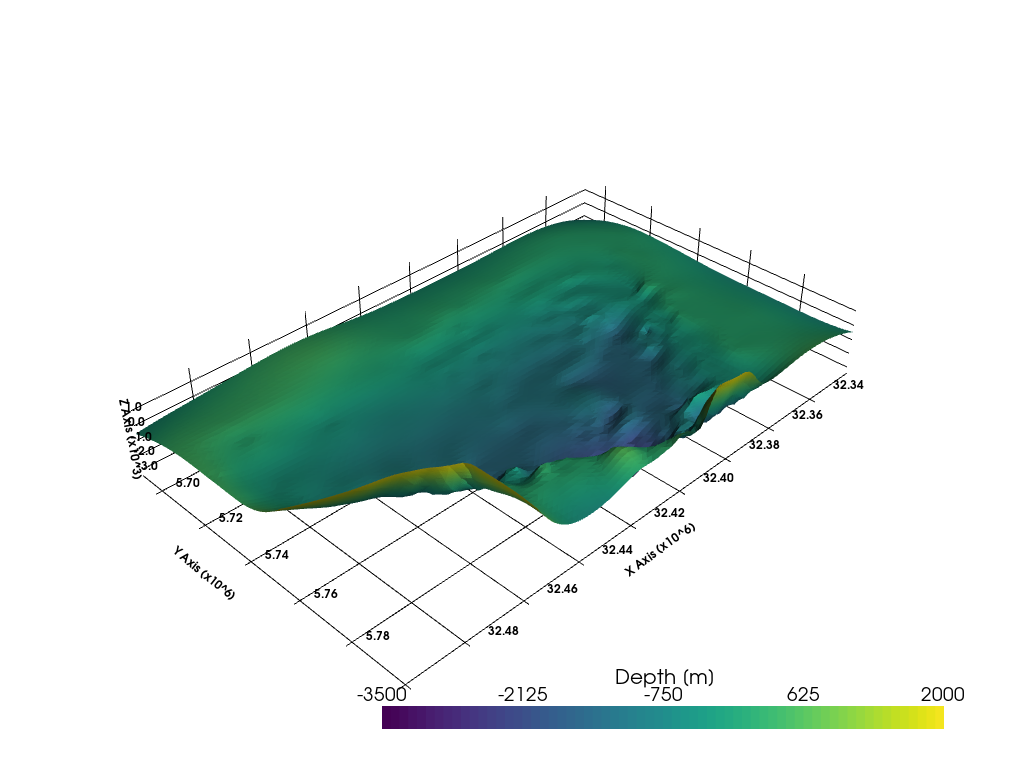

In [3]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh,scalar_bar_args=sargs, clim=[-3500, 2000])

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,5)
p.show()

In [4]:
data = pd.read_csv(file_path + 'Borehole_Data.csv')
data.head()

,Unnamed: 0,Index,Name,X,Y,Z,Altitude,Depth,formation,geometry
0,2091,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,27.00,107.00,5956.00,OberCampanium,POINT (32386176.36 5763283.15)
1,2092,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-193.00,107.00,5956.00,UnterCampanium,POINT (32386176.36 5763283.15)
2,2093,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-268.00,107.00,5956.00,OberSantonium,POINT (32386176.36 5763283.15)
3,2094,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-828.00,107.00,5956.00,MittelSantonium,POINT (32386176.36 5763283.15)
4,2095,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-988.00,107.00,5956.00,UnterSantonium,POINT (32386176.36 5763283.15)


In [5]:
data['formation'].unique()

array(['OberCampanium', 'UnterCampanium', 'OberSantonium',
       'MittelSantonium', 'UnterSantonium', 'OberConiacium',
       'UnterConiacium', 'MittelTuronium', 'UnterTuronium',
       'OberCenomanium', 'MittelCenomanium', 'UnterCenomanium',
       'OberAlbium', 'MittelAlbium', 'EssenFM', 'BochumFM', 'WittenFM',
       'Carboniferous', 'Devonian', 'Quaternary', 'MittelConiacium'],
      dtype=object)

## Defining Color Dict

In [6]:
color_dict = {  
        'OberCampanium':'#3182bd', 'UnterCampanium':'#9ecae1',
        'OberSantonium': '#e6550d', 'MittelSantonium': '#fdae6b', 'UnterSantonium': '#fdd0a2',
        'OberConiacium': '#31a354', 'MittelConiacium': '#74c476', 'UnterConiacium': '#a1d99b', 
        'OberTuronium': '#756bb1', 'MittelTuronium': '#9e9ac8', 'UnterTuronium': '#9e9ac8',
        'OberCenomanium': '#636363', 'MittelCenomanium': '#969696', 'UnterCenomanium': '#d9d9d9',
        'OberAlbium': '#637939', 'MittelAlbium': '#8ca252',
        'EssenFM': '#e7969c', 'BochumFM': '#7b4173', 'WittenFM': '#a55194',
        'Carboniferous': '#de9ed6', 'Devonian': '#de9ed6', 'Quaternary': '#de9ed6',
        }

## Adding a row to the wells

In [7]:
grouped = data.groupby(['Index'])
df_groups = [grouped.get_group(x) for x in grouped.groups]

list_df = gg.visualization.add_row_to_boreholes(df_groups)

list_df[0].head()

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 105.22it/s]


,Unnamed: 0,Index,Name,X,Y,Z,Altitude,Depth,formation,geometry
0,nan,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,107.00,107.00,5956.00,,NaN
0,2091.00,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,27.00,107.00,5956.00,OberCampanium,POINT (32386176.36 5763283.15)
1,2092.00,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-193.00,107.00,5956.00,UnterCampanium,POINT (32386176.36 5763283.15)
2,2093.00,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-268.00,107.00,5956.00,OberSantonium,POINT (32386176.36 5763283.15)
3,2094.00,GD1017,ForschungsbohrungMünsterland1,32386176.36,5763283.15,-828.00,107.00,5956.00,MittelSantonium,POINT (32386176.36 5763283.15)


## Creating Lines From Points

In [8]:
lines = gg.visualization.create_lines_from_points(df=list_df[0])
lines

PolyData,Information
N Cells,39
N Points,20
X Bounds,"3.239e+07, 3.239e+07"
Y Bounds,"5.763e+06, 5.763e+06"
Z Bounds,"-5.849e+03, 1.070e+02"
N Arrays,0


## Creating Borehole Tubes

In [9]:
tubes, df_groups = gg.visualization.create_borehole_tubes(df=data, 
                                               min_length= 10,
                                               radius=1000)
tubes[0]

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 153.78it/s]


PolyData (0x1f7615db820)
  N Cells:	418
  N Points:	1520
  X Bounds:	3.239e+07, 3.239e+07
  Y Bounds:	5.762e+06, 5.764e+06
  Z Bounds:	-5.849e+03, 1.070e+02
  N Arrays:	2

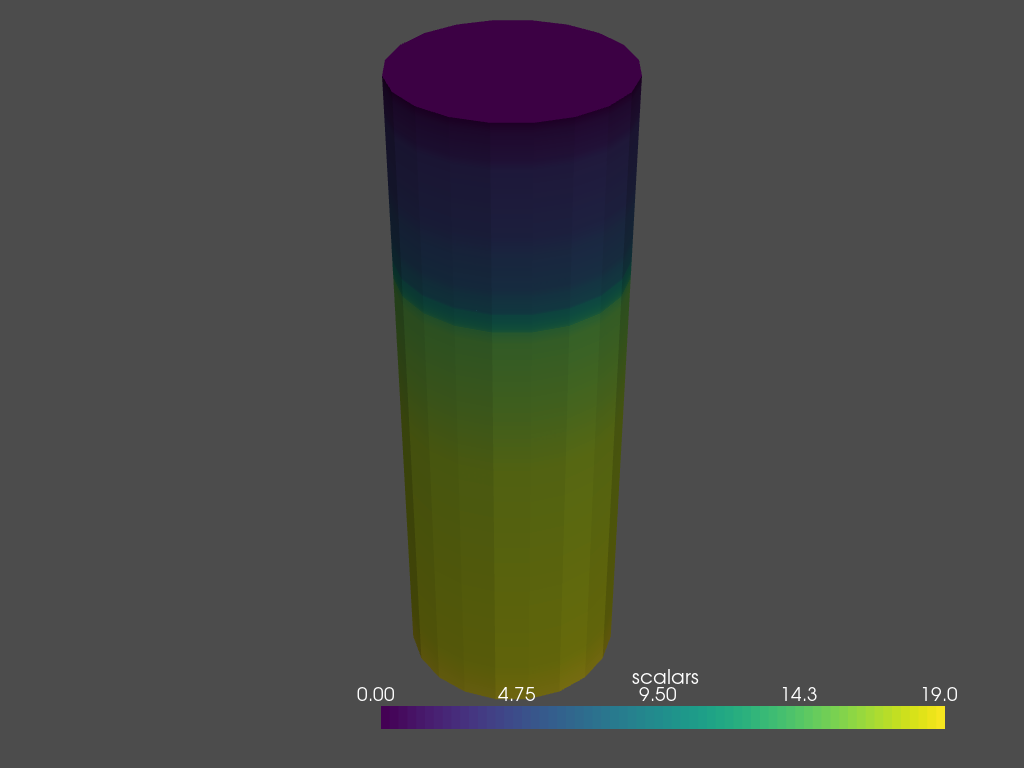

In [10]:
tubes[0].plot()

In [11]:
labels = gg.visualization.create_borehole_labels(df=data)
labels

PolyData (0x1f7615dbfa0)
  N Cells:	2
  N Points:	2
  X Bounds:	3.239e+07, 3.240e+07
  Y Bounds:	5.753e+06, 5.763e+06
  Z Bounds:	6.000e+01, 1.070e+02
  N Arrays:	1

## Creating Borehole Tube and Labels

In [12]:
tubes, labels, df_groups = gg.visualization.create_boreholes_3d(df=data,
                                                                min_length=10,
                                                                color_dict=color_dict,
                                                                radius=1000)
tubes

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 250.10it/s]


MultiBlock (0x1f7616040a0)
  N Blocks:	2
  X Bounds:	32385176.360, 32404939.830
  Y Bounds:	5751889.550, 5764283.150
  Z Bounds:	-5849.000, 107.000

In [13]:
tubes[0]

PolyData (0x1f761604520)
  N Cells:	418
  N Points:	1520
  X Bounds:	3.239e+07, 3.239e+07
  Y Bounds:	5.762e+06, 5.764e+06
  Z Bounds:	-5.849e+03, 1.070e+02
  N Arrays:	2

In [14]:
labels

PolyData (0x1f761604100)
  N Cells:	2
  N Points:	2
  X Bounds:	3.239e+07, 3.240e+07
  Y Bounds:	5.753e+06, 5.763e+06
  Z Bounds:	6.000e+01, 1.070e+02
  N Arrays:	1

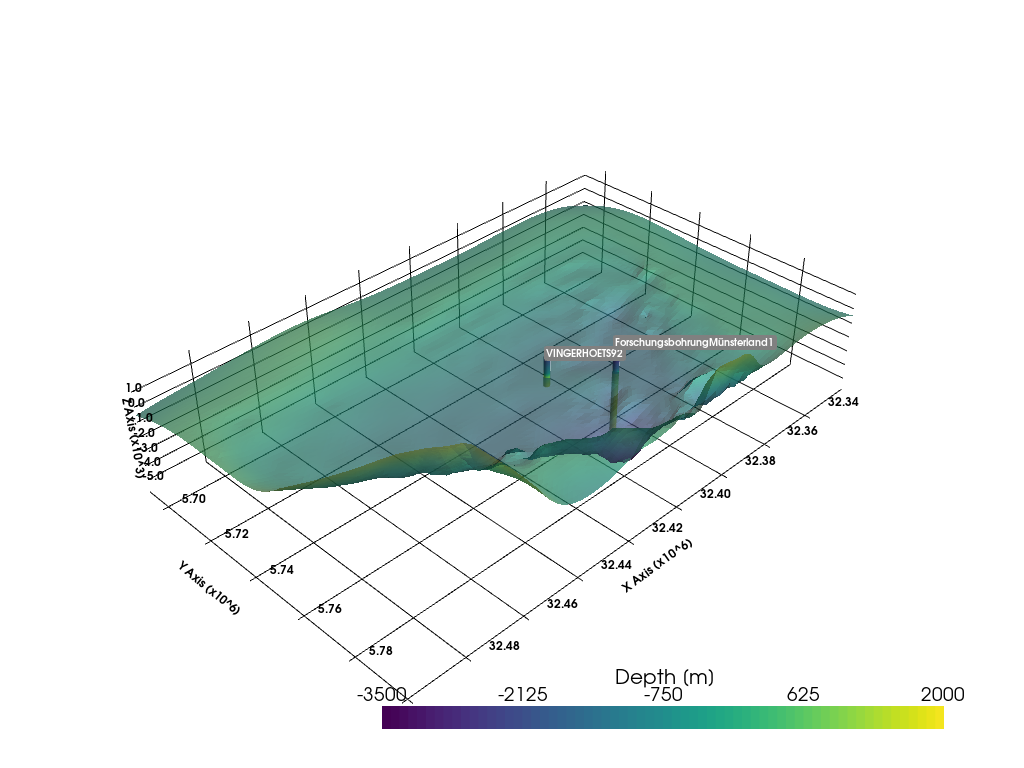

In [15]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh,scalar_bar_args=sargs, clim=[-3500, 2000], opacity=0.7)
p.add_point_labels(labels, "Labels", point_size=5, font_size=10)
p.add_mesh(tubes, show_scalar_bar=False)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,5)
p.show()

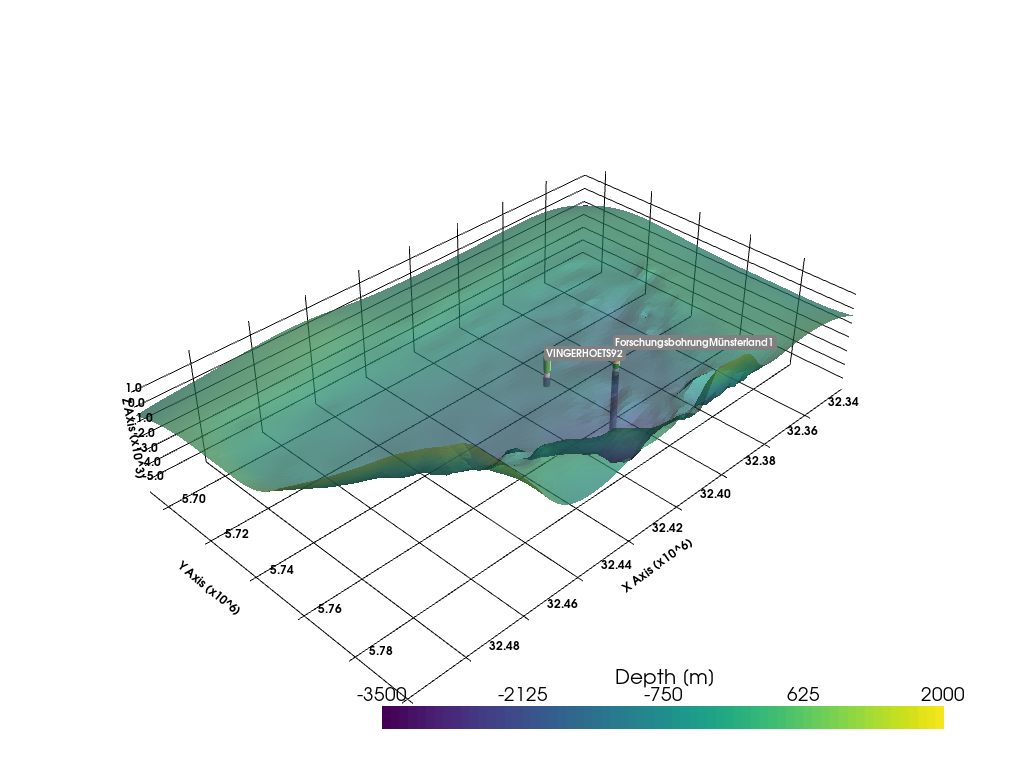

In [16]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(mesh,scalar_bar_args=sargs, clim=[-3500, 2000], opacity=0.7)
p.add_point_labels(labels, "Labels", point_size=5, font_size=10)

for j in range(len(tubes)):
        df_groups[j] = df_groups[j][1:]
        p.add_mesh(mesh=tubes[j], cmap=[color_dict[i] for i in df_groups[j]['formation'].unique()], show_scalar_bar=False)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,5)
p.show()
    